epoch=0, loss=0.60958
epoch=100, loss=0.59399
epoch=200, loss=0.58807
epoch=300, loss=0.58318
epoch=400, loss=0.57965
epoch=500, loss=0.57371
epoch=600, loss=0.57689
epoch=700, loss=0.56683
epoch=800, loss=0.56671
epoch=900, loss=0.56602
epoch=1000, loss=0.57123
epoch=1100, loss=0.55998
epoch=1200, loss=0.55708
epoch=1300, loss=0.56992
epoch=1400, loss=0.56915
epoch=1500, loss=0.55802
epoch=1600, loss=0.55833
epoch=1700, loss=0.55967
epoch=1800, loss=0.55868
epoch=1900, loss=0.54285
epoch=2000, loss=0.54159
epoch=2100, loss=0.54642
epoch=2200, loss=0.54579
epoch=2300, loss=0.54415
epoch=2400, loss=0.54400
epoch=2500, loss=0.55008
epoch=2600, loss=0.54456
epoch=2700, loss=0.53871
epoch=2800, loss=0.54257
epoch=2900, loss=0.53156
epoch=3000, loss=0.53911
epoch=3100, loss=0.53107
epoch=3200, loss=0.54232
epoch=3300, loss=0.54040
epoch=3400, loss=0.54283
epoch=3500, loss=0.53190
epoch=3600, loss=0.52976
epoch=3700, loss=0.54759
epoch=3800, loss=0.52935
epoch=3900, loss=0.53849
epoch=4000, 

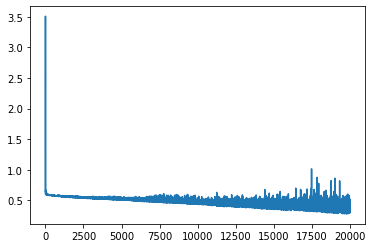

accuracy = 85.15%


In [33]:
# MSE -> BCE loss로 변경 (220502)
# lr 변경 (220502)

import pandas as pd
import torch
import matplotlib.pyplot as plt

dataset = pd.read_csv('heart.csv').to_numpy()
x = torch.Tensor(dataset[:,0:-1])
y = torch.Tensor(dataset[:,[-1]])

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = torch.nn.Linear(13, 16)
        self.fc2 = torch.nn.Linear(16, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 1)

        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        z1 = self.fc1(x)
        yh1 = self.relu(z1)

        z2 = self.fc2(yh1)
        yh2 = self.relu(z2)

        z3 = self.fc3(yh2)
        yh3 = self.relu(z3)

        z4 = self.fc4(yh3)
        y_hat = self.sigmoid(z4)

        return y_hat

net = Net()
bce = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

loss_lst = []
EPOCH = 20000

for epoch in range(EPOCH):
    y_hat = net(x)

    loss = bce(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_lst.append(loss.item())

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={loss.item():0.5f}')

plt.plot(range(EPOCH), loss_lst)
plt.show()

y_hat = net(x)
y_hat = torch.Tensor([1 if yh>0.5 else 0 for yh in y_hat]).view(-1,1)
correct = torch.sum(y_hat==y)
accuracy = correct / len(y) * 100
print(f'accuracy = {accuracy:0.2f}%')